In [47]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.21.0%2Bcu118-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.6.0%2Bcu118-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 GB 991.0 kB/s eta 0:45:54
   ---------------------------------------- 0.0/2.7 GB 991.0 kB/s eta 0:45:54
   ---------------------------------------- 0.0/2.7 GB 469.7 kB/s eta 1:36:50
   ---------------------------------------- 0.0/2.7 GB 804.6 kB/s eta 0:56:32
   ---------------------------------------- 0.0/2.7 GB 857.5 kB/s eta 0:53:02
   ---------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\manoj\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\manoj\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\anaconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recognized Phonemes: THE EXAMINATION AND TESTIMONY OF THE EXPERTS ENABLED THE COMMISSION TO CONCLUDE THAT FIVE SHOTS MAY HAVE BEEN FIRED


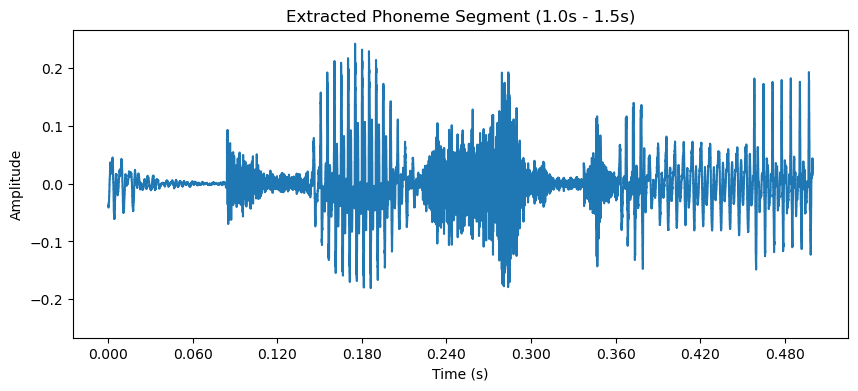

Extracted Phoneme Label: THE EXAMINATION AND TESTIMONY OF THE EXPERTS ENABLED THE COMMISSION TO CONCLUDE THAT FIVE SHOTS MAY HAVE BEEN FIRED


In [66]:
# Import necessary libraries
import torch
import torchaudio
import librosa
import librosa.display
import matplotlib.pyplot as plt
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import numpy as np

# Step 1: Load a speech signal from the LJ Speech dataset
file_path = "LJ037-0171 (1).wav"
waveform, sample_rate = torchaudio.load(file_path)

# Step 2: Preprocess the audio (convert to mono and resample to 16kHz)
# Convert to mono if the audio is stereo
if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)

# Resample to 16kHz
resample_rate = 16000
resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=resample_rate)
waveform = resampler(waveform)

# Step 3: Use a pre-trained Wav2Vec2 model to recognize phonemes
# Load the pre-trained Wav2Vec2 model and processor
model_name = "facebook/wav2vec2-large-960h"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)

# Preprocess the waveform for Wav2Vec2
input_values = processor(waveform.squeeze().numpy(), sampling_rate=resample_rate, return_tensors="pt").input_values

# Perform inference
with torch.no_grad():
    logits = model(input_values).logits

# Decode the predicted phonemes
predicted_ids = torch.argmax(logits, dim=-1)
recognized_phonemes = processor.decode(predicted_ids[0])

# Print recognized phonemes
print("Recognized Phonemes:", recognized_phonemes)

# Step 4: Extract a phoneme segment from the speech signal based on time intervals
# Define a time interval (in seconds) for the phoneme you want to extract
start_time = 1.0  # Start time in seconds
end_time = 1.5    # End time in seconds

# Convert time to sample indices
start_sample = int(start_time * resample_rate)
end_sample = int(end_time * resample_rate)

# Extract the phoneme segment
phoneme_segment = waveform[:, start_sample:end_sample]

# Step 5: Label and visualize the extracted phoneme
# Plot the waveform of the extracted phoneme segment
plt.figure(figsize=(10, 4))
librosa.display.waveshow(phoneme_segment.squeeze().numpy(), sr=resample_rate)
plt.title(f"Extracted Phoneme Segment ({start_time}s - {end_time}s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Print the label of the extracted phoneme
# Align the recognized phonemes with the time interval
# Note: This is a simplified alignment. For precise alignment, use forced alignment tools.
print(f"Extracted Phoneme Label: {recognized_phonemes}")

In [51]:
pip install torch

  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB 187.9 kB/s eta 0:18:07
   ---------------------------------------- 0.0/204.1 MB 187.9 kB/s eta 0:18:07
   ---------------------------------------- 0.0/204.1 MB 164.3 kB/s eta 0:20:43
   ---------------------------------------- 0.1/204.1 MB 245.8 kB/s eta 0:13:51
   ---------------------------------------- 0.1/204.1 MB 312.2 kB/s eta 0:10:54
   ---------------------------------------- 0.2/204.1 MB 436.9 kB/s eta 0:07:47
   ------------------------------

In [55]:
pip install torchaudio

  Using cached torchaudio-2.6.0-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
Using cached torchaudio-2.6.0-cp312-cp312-win_amd64.whl (2.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install transformers

  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 163.8 kB/s eta 0:01:01
   ---------------------------------------- 0.0/10.0 MB 163.4 kB/s eta 0:01:01
   ---------------------------------------- 0.1/10.0 MB 231.0 kB/s eta 0:00:43
   ---------------------------------------- 0.1/10.0 MB 310.3 kB/s eta 0:00:32
   ---------------------------------------- 0.1/10.0 MB 343.4 kB/s eta 0:00:29
    ------------------------------